In [1]:
df <- read.csv("/home/pawel/Pobrane/day.csv", sep = ",")

In [2]:
head(df, 10)

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606
7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.1687260,148,1362,1510
8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.2668040,68,891,959
9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.3619500,54,768,822
10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.2232670,41,1280,1321


In [3]:
typeof(df)

[1] "list"

In [4]:
df$windspeed <- df$windspeed * 67 #Normalized wind speed. The values are divided to 67

In [5]:
head(df, 10)

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,10.749882,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,16.652113,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,16.636703,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,10.739832,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,12.522300,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,6.000868,88,1518,1606
7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,11.304642,148,1362,1510
8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,17.875868,68,891,959
9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,24.250650,54,768,822
10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,14.958889,41,1280,1321


In [6]:
library(ISLR)

In [7]:
lm.fit=lm(registered~windspeed, data = df)
attach(df)
lm.fit=lm(registered~windspeed)

In [8]:
lm.fit


Call:
lm(formula = registered ~ windspeed)

Coefficients:
(Intercept)    windspeed  
    4490.10       -65.34  


In [9]:
summary(lm.fit)


Call:
lm(formula = registered ~ windspeed)

Residuals:
    Min      1Q  Median      3Q     Max 
-3575.7 -1126.8   -48.3  1089.2  3525.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4490.10     149.66  30.002  < 2e-16 ***
windspeed     -65.34      10.86  -6.015 2.84e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1524 on 729 degrees of freedom
Multiple R-squared:  0.04728,	Adjusted R-squared:  0.04598 
F-statistic: 36.18 on 1 and 729 DF,  p-value: 2.844e-09


In [10]:
names(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [11]:
coef(lm.fit)

(Intercept)   windspeed 
 4490.09761   -65.34145

In [12]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),4196.28174,4783.91347
windspeed,-86.66793,-44.01498


In [13]:
predict(lm.fit, data.frame(windspeed = (c(5,10,15))),
       interval = "confidence")

,fit,lwr,upr
1,4163.390,3964.263,4362.518
2,3836.683,3711.318,3962.049
3,3509.976,3389.468,3630.484


In [14]:
predict(lm.fit, data.frame(windspeed = (c(5,10,15))),
       interval = "prediction")

,fit,lwr,upr
1,4163.390,1164.8849,7161.896
2,3836.683,842.1715,6831.195
3,3509.976,515.6636,6504.288


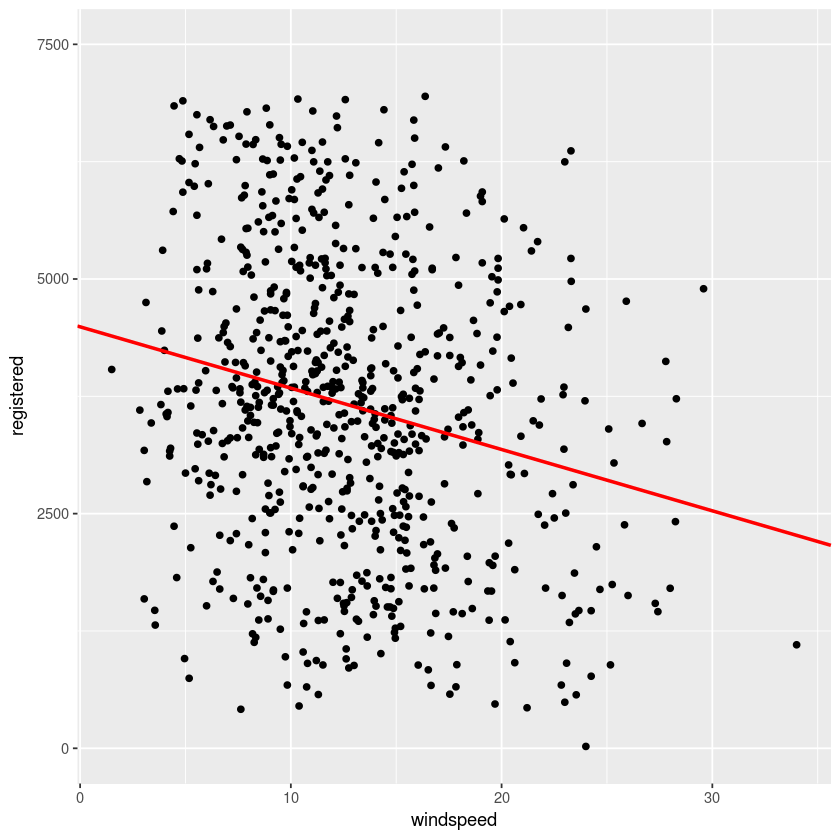

In [16]:
library(ggplot2)
line <- data.frame(windspeed,registered)
ggplot()+
    geom_point(data = df, aes(x = windspeed, y = registered))+
    scale_y_continuous(limits = c(0,7500), breaks = seq(0,7500,2500))+
    geom_abline(intercept = 4490.10, slope = -65.34, color = "red", size = 1)
   
   